In [1]:
import numpy
import pandas
import tensorflow as tf

In [2]:
train_set = pandas.read_csv('emnist-bymerge-train.csv')
test_set = pandas.read_csv('emnist-bymerge-test.csv')

In [3]:
train_label = numpy.array(train_set.iloc[:,0].values)
train_data = numpy.array(train_set.iloc[:,1:].values)

In [4]:
import matplotlib.pyplot as plt

In [5]:
label = {
    0: '0',
    1: '1',
    2: '2',
    3: '3',
    4: '4',
    5: '5',
    6: '6', 
    7: '7',
    8: '8', 
    9: '9',
    10: 'A',
    11: 'B',
    12: 'C',
    13: 'D',
    14: 'E',
    15: 'F',
    16: 'G',
    17: 'H',
    18: 'I',
    19: 'J',
    20: 'K',
    21: 'L',
    22: 'M',
    23: 'N',
    24: 'O',
    25: 'P',
    26: 'Q',
    27: 'R',
    28: 'S',
    29: 'T',
    30: 'U',
    31: 'V',
    32: 'W',
    33: 'X',
    34: 'Y',
    35: 'Z',
    36: 'a',
    37: 'b',
    38: 'd',
    39: 'e',
    40: 'f',
    41: 'g',
    42: 'h',
    43: 'n',
    44: 'q',
    45: 'r',
    46: 't'
}

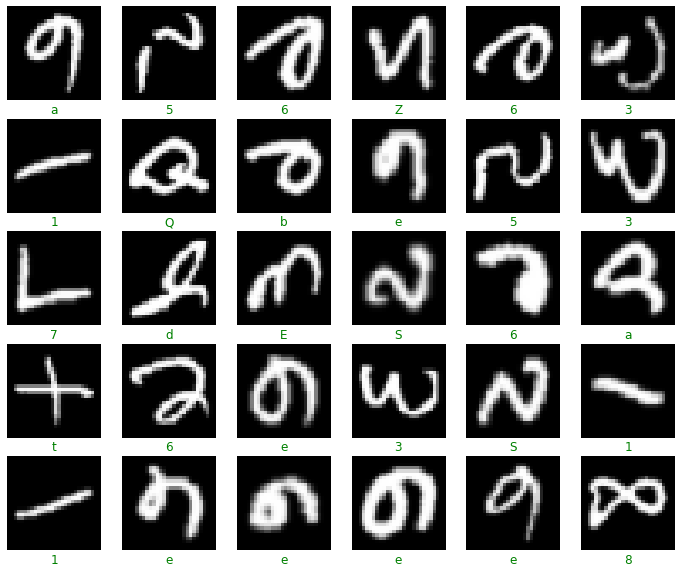

In [6]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(train_data[i].reshape([28,28]),cmap="gray") 
    plt.axis("off")
    plt.title(label[train_label[i]], y=-0.2,color="green")

In [7]:
# Transform label
train_label = tf.keras.utils.to_categorical(train_label, 47)

In [8]:
train_data = train_data.astype('float32')

In [9]:
train_data /= 255

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(784,)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(47, activation=tf.nn.softmax))

In [12]:
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(train_data, train_label, epochs=5)

Train on 697931 samples
Epoch 1/5
697931/697931 [==============================] - 98s 141us/sample - loss: 0.5895 - accuracy: 0.8101
Epoch 2/5
697931/697931 [==============================] - 94s 135us/sample - loss: 0.4761 - accuracy: 0.8426
Epoch 3/5
697931/697931 [==============================] - 97s 138us/sample - loss: 0.4596 - accuracy: 0.8482
Epoch 4/5
697931/697931 [==============================] - 97s 139us/sample - loss: 0.4505 - accuracy: 0.8515
Epoch 5/5
697931/697931 [==============================] - 98s 140us/sample - loss: 0.4461 - accuracy: 0.8529


In [15]:
test_label = numpy.array(test_set.iloc[:,0].values)
test_data = numpy.array(test_set.iloc[:,1:].values)

In [16]:
test_label = tf.keras.utils.to_categorical(test_label, 47)

In [17]:
test_data = test_data.astype('float32')

In [18]:
test_data /= 255

In [19]:
val_loss, val_acc = model.evaluate(test_data, test_label)

116322/116322 [==============================] - 6s 53us/sample - loss: 0.3702 - accuracy: 0.8739


In [20]:
predictions = model.predict([test_data])

In [21]:
predictions

array([[2.7133293e-09, 5.0742420e-14, 1.7108597e-14, ..., 6.4747470e-14,
        6.9784543e-12, 2.8742727e-12],
       [3.6306909e-09, 2.2114412e-08, 3.7008402e-08, ..., 3.2661060e-07,
        4.3153117e-09, 9.7983408e-09],
       [7.9220200e-01, 3.9613161e-13, 1.5607859e-09, ..., 2.6995624e-11,
        3.1568530e-12, 9.5820999e-12],
       ...,
       [3.2061655e-18, 1.4526584e-20, 3.4063048e-11, ..., 1.2197681e-17,
        3.0727208e-28, 1.6652676e-17],
       [2.8896887e-09, 7.2220685e-13, 1.2583542e-06, ..., 3.2185812e-09,
        8.1891527e-25, 5.0432155e-15],
       [5.0601553e-08, 3.5361529e-05, 5.1610606e-08, ..., 2.8415712e-05,
        1.3460235e-06, 8.8672165e-04]], dtype=float32)

In [22]:
label_predict = numpy.argmax(predictions[0])

In [24]:
label[label_predict]

'M'

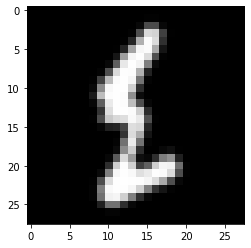

In [25]:
plt.imshow(test_data[0].reshape([28,28]),cmap="gray") 

In [27]:
label_real = numpy.argmax(predictions[0])

In [28]:
label[label_real]

'M'

In [30]:
model.save('my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets


In [31]:
new_model = tf.keras.models.load_model('my_model')

In [33]:
loss, acc = new_model.evaluate(test_data, test_label)

116322/116322 [==============================] - 6s 53us/sample - loss: 0.3678 - accuracy: 0.8739
